<a href="https://colab.research.google.com/github/harshit7271/Deep_learning_with_PyTorch/blob/main/Computer_Vision_with_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Computer Vision**
* See the book : [THE REFERENCE BOOK I AM FOLLOWING](https://www.learnpytorch.io/03_pytorch_computer_vision/)

## **1. Computer vision libraries in PyTorch**
* [`torchvision`](https://www.learnpytorch.io/03_pytorch_computer_vision/) - base domain libraries for PyTorch computer vision
* `torchvision.dataset` - Get datasets and data loading functions for computer vision here
* `torchvision.models` - get pretrained computer vision models that you can laverage for your own problems
* `torchvision.transforms` - functions for manipulating your vision data(image) to be suitable for use with ML model
* `torch.utils.data.Dataset` - Base dataset class for PyTorch.
* `torch.utils.data.DataLoader` - Create a PyTorch iterable over a dataset

In [1]:
import torch
from torch import nn

# import torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor    # convert a PIL Image or numpy.ndarray to tensors

import matplotlib.pyplot as plt

# check versions
print(torch.__version__)
print(torchvision.__version__)

2.8.0+cu126
0.23.0+cu126


## **2. Getting a dataset**
The data set we will be using is FashionMNIST FROM `torchvision.datsets` - https://docs.pytorch.org/vision/stable/generated/torchvision.datasets.FashionMNIST.html






In [2]:
# Setup training data
from torchvision import datasets
train_data = datasets.FashionMNIST(
    root="data",   # where to download data to
    train=True,   # do we want the training dataset
    download=True,
    transform=ToTensor(),  # how do we want to tranform the data
    target_transform=None   # How do we want to transform the labels/targets?
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

100%|██████████| 26.4M/26.4M [00:01<00:00, 20.7MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 342kB/s]
100%|██████████| 4.42M/4.42M [00:00<00:00, 6.18MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 21.3MB/s]


In [3]:
len(train_data), len(test_data)

(60000, 10000)

In [4]:
# See the first training example
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [5]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [6]:
class_to_idx = train_data.class_to_idx
class_to_idx   # gives us dictionary of different labels in their corresponding index

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [7]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

## **2.1 Check Input and Output shapes of data**

In [8]:
# check the shape of our image
print(f"Image Shape : {image.shape} -> [color_channels, height, width]")
print(f"Image label : {class_names[label]}")

Image Shape : torch.Size([1, 28, 28]) -> [color_channels, height, width]
Image label : Ankle boot


## **2.2 Visualizing our Data**

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

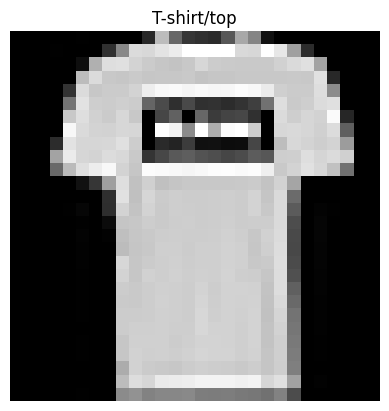

In [9]:
import matplotlib.pyplot as plt
image, label = train_data[1]
plt.imshow(image.squeeze(), cmap='grey')
plt.title(class_names[label])
plt.axis("off")

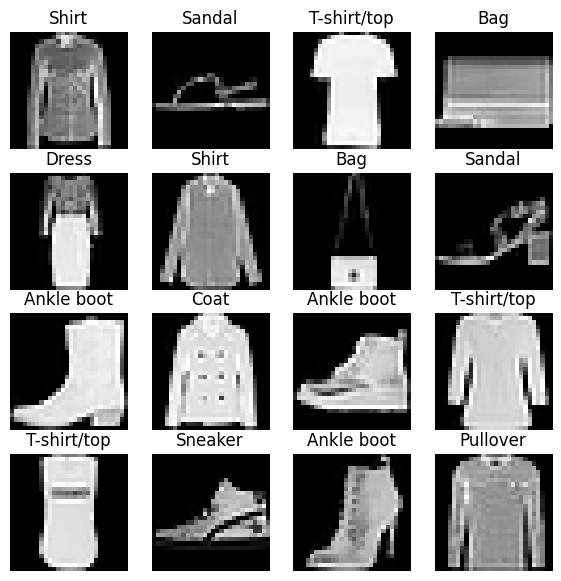

In [10]:
# plot more images
# torch.manual_seed(42)
fig = plt.figure(figsize=(7,7))
rows, cols = 4,4
for i in range(1, rows * cols + 1):
  random_idx = torch.randint(0, len(train_data), size=[1]).item()
  image, label = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(image.squeeze(), cmap='gray')
  plt.title(class_names[label])
  plt.axis("off")

**The code `random_idx = torch.randint(0, len(train_data), size=[1]).item()` it selects a random index from the entire dataset `train_data` rather than just a batch.**

* `torch.randint(0, len(train_data), size=[1])` generates a tensor containing one random integer, uniformly sampled between 0 (inclusive) and the length of the whole dataset (exclusive).

* `.item()` extracts this random integer as a plain Python int, suitable for indexing.

* This is typically used when you want to randomly pick one sample from your whole dataset (not limited to a batch) for inspection, data augmentation, visualization, or debugging purposes. It helps you select a random data point without creating a new data loader or loop.​

***Thus, this line randomly picks one index that can be used to access a single example anywhere in your full training dataset.***


In [11]:
train_data, test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

# **3. Prepare DataLoader**
* Right now, our data is in the form of PyTorch Datasets.
* DataLoader turns our dataset into a Python iterable
* More specificially, we want to turn our data into batches (or mini-batches).

Why would we do this?
1. It is more computationally efficient, as in, your computing hardware may not be able to look (store in memory) at 60000 images in one hit. So we break it down to 32 images at a time (batch size of 32)
2. It gives our neural network more chances to update its gradients per epoch


In [12]:
from torch.utils.data import DataLoader

# Setup the batch size hyperparameter
BATCH_SIZE = 32

# Turn datsets into iterable (batches)
train_dataloader =  DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)

test_dataloader = DataLoader(dataset=test_data, batch_size=BATCH_SIZE, shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7e803b770aa0>,
 <torch.utils.data.dataloader.DataLoader at 0x7e803b9444a0>)

In [13]:
# Let's check out what we've created
print(f"DataLoaders : {train_dataloader, test_dataloader}")
print(f"Length of train dataloader : {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader : {len(test_dataloader)} batches of {BATCH_SIZE}")

DataLoaders : (<torch.utils.data.dataloader.DataLoader object at 0x7e803b770aa0>, <torch.utils.data.dataloader.DataLoader object at 0x7e803b9444a0>)
Length of train dataloader : 1875 batches of 32
Length of test dataloader : 313 batches of 32


In [14]:
# Check out what's inside thetraining dataloader
train_features_batch, train_labels_batch =next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

> `iter(train_dataloader)`: This converts the DataLoader (which is an iterable) into an iterator. An iterator is an object that lets you access items one at a time.

> `next(...)`: The `next()` function retrieves the next item from an iterator. In this context, it returns the first batch—a tuple containing a batch of features and the corresponding labels—from the DataLoader

**This approach is useful when you want to quickly sample or inspect one batch—for example, to check tensor shapes, visualize some data, or debug—without running a full loop. If you wanted to process all batches, you would typically use a for loop over the DataLoader.**

* **In summary: Using `next(iter(...))` grabs the "first" batch produced by the DataLoader, allowing instant access to sample data for inspection or visualization**

Image size : torch.Size([1, 28, 28])
Label : 1, labels size : torch.Size([])


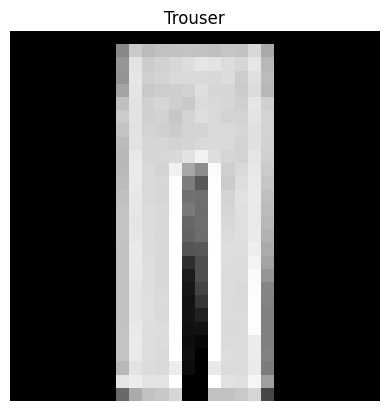

In [15]:
# show a sample
#torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)
print(f"Image size : {img.shape}")
print(f"Label : {label}, labels size : {label.shape}")

### **3.1 Model 0: Build a baseline model**

When starting to build a series of machine learning modeling experiments. It's best practice to start with a baseline  model